In [1]:
import pandas as pd
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
import time
from IPython.display import clear_output
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree

In [2]:
#Preprocess training set
data=pd.read_csv('C:/Users/X99S5/Documents/AMLS_22-23_SN18046828/Datasets/cartoon_set/labels.csv')

labelsTrain = data["\teye_color\tface_shape\tfile_name"].str.split(pat="\t", n=-1, expand=True)
labelsTrain.drop(columns =[0,2], inplace = True)
labelsTrain.columns = [ "eye_color" , "img_name"]
labelsTrain = labelsTrain.astype({'eye_color': 'int32'})
labelsTrain = labelsTrain.astype({'img_name': 'string'})

#Preprocess testing set
data=pd.read_csv('C:/Users/X99S5/Documents/AMLS_22-23_SN18046828/Datasets/cartoon_set_test/labels.csv')

labelsTest = data["\teye_color\tface_shape\tfile_name"].str.split(pat="\t", n=-1, expand=True)
labelsTest.drop(columns =[0,2], inplace = True)
labelsTest.columns = [ "eye_color" , "img_name"]
labelsTest = labelsTest.astype({'eye_color': 'int32'})
labelsTest = labelsTest.astype({'img_name': 'string'})

In [ ]:
#230:270,180:320

In [495]:
#Load training set################################
imagesTrain_r = np.zeros((10000, 50 , 50, 3)) 
imagesTrain_g = np.zeros((10000, 50 , 50, 3))
imagesTrain_b = np.zeros((10000, 50 , 50, 3)) 
for i in range(0,10000):
    image = cv.imread('C:/Users/X99S5/Documents/AMLS_22-23_SN18046828/Datasets/cartoon_set/img/' + labelsTrain["img_name"][i])
    image = image[160:270,180:320] # cut 95 from left / right sides , 75 from top, 80 from the bottom
    image = cv.resize(image, dsize=(50 , 50), interpolation=cv.INTER_CUBIC)
    
    imagesTrain_r[i] = image.copy()
    imagesTrain_g[i] = image.copy()
    imagesTrain_b[i] = image.copy()
    
    imagesTrain_r[i][:, :, 1] = 0
    imagesTrain_r[i][:, :, 2] = 0
    
    imagesTrain_g[i][:, :, 0] = 0
    imagesTrain_g[i][:, :, 2] = 0
    
    imagesTrain_b[i][:, :, 0] = 0
    imagesTrain_b[i][:, :, 1] = 0
    
    
    
   
imagesTrain_r = imagesTrain_r.reshape(10000,7500)    
imagesTrain_r = pd.DataFrame(imagesTrain_r) 

imagesTrain_g = imagesTrain_g.reshape(10000,7500)    
imagesTrain_g = pd.DataFrame(imagesTrain_g) 

imagesTrain_b = imagesTrain_b.reshape(10000,7500)    
imagesTrain_b = pd.DataFrame(imagesTrain_b) 

#Load Testing set################################
imagesTest_r = np.zeros((2500, 50 , 50, 3)) 
imagesTest_g = np.zeros((2500, 50 , 50, 3))
imagesTest_b = np.zeros((2500, 50 , 50, 3)) 

for i in range(0,2500):
    image = cv.imread('C:/Users/X99S5/Documents/AMLS_22-23_SN18046828/Datasets/cartoon_set_test/img/' + labelsTest["img_name"][i])
    image = image[160:270,180:320]
    image = cv.resize(image, dsize=(50 , 50), interpolation=cv.INTER_CUBIC)
    
    imagesTest_r[i] = image.copy()
    imagesTest_g[i] = image.copy()
    imagesTest_b[i] = image.copy()
    
    imagesTest_r[i][:, :, 1] = 0
    imagesTest_r[i][:, :, 2] = 0
    
    imagesTest_g[i][:, :, 0] = 0
    imagesTest_g[i][:, :, 2] = 0
    
    imagesTest_b[i][:, :, 0] = 0
    imagesTest_b[i][:, :, 1] = 0
   
    


imagesTest_r = imagesTest_r.reshape(2500,7500)    
imagesTest_r = pd.DataFrame(imagesTest_r) 

imagesTest_g = imagesTest_g.reshape(2500,7500)    
imagesTest_g = pd.DataFrame(imagesTest_g) 

imagesTest_b = imagesTest_b.reshape(2500,7500)    
imagesTest_b = pd.DataFrame(imagesTest_b) 


In [494]:
imagesTrain_r

,0
0,50.0
1,50.0
2,50.0
3,50.0
4,50.0
...,...
24277566,9.0
24277567,9.0
24277568,9.0
24277569,42.0


In [367]:
x_train=np.zeros((10000,7502))
for i in range(0,10000):
    x_train[i]=np.convolve(imagesTrain.iloc[i,:],[0.066,-5.599,5.566])
    
x_test=np.zeros((2500,7502))
for i in range(0,2500):
    x_test[i]=np.convolve(imagesTest.iloc[i,:],[0.066,-5.599,5.566])
    



In [492]:
imagesTrain_r

,0,1,2,3,4,5,6,7,8,9,...,7490,7491,7492,7493,7494,7495,7496,7497,7498,7499
0,50.0,NaN,NaN,50.0,NaN,NaN,50.0,NaN,NaN,50.0,...,NaN,6.0,NaN,NaN,6.0,NaN,NaN,6.0,NaN,NaN
1,174.0,NaN,NaN,174.0,NaN,NaN,174.0,NaN,NaN,174.0,...,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN
2,50.0,NaN,NaN,50.0,NaN,NaN,50.0,NaN,NaN,50.0,...,NaN,255.0,NaN,NaN,85.0,NaN,NaN,110.0,NaN,NaN
3,28.0,NaN,NaN,28.0,NaN,NaN,28.0,NaN,NaN,28.0,...,NaN,43.0,NaN,NaN,193.0,NaN,NaN,193.0,NaN,NaN
4,174.0,NaN,NaN,174.0,NaN,NaN,174.0,NaN,NaN,174.0,...,NaN,255.0,NaN,NaN,106.0,NaN,NaN,193.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,98.0,NaN,NaN,126.0,NaN,NaN,126.0,NaN,NaN,126.0,...,NaN,58.0,NaN,NaN,74.0,NaN,NaN,123.0,NaN,NaN
9996,138.0,NaN,NaN,138.0,NaN,NaN,138.0,NaN,NaN,138.0,...,NaN,56.0,NaN,NaN,147.0,NaN,NaN,146.0,NaN,NaN
9997,50.0,NaN,NaN,50.0,NaN,NaN,50.0,NaN,NaN,50.0,...,NaN,56.0,NaN,NaN,181.0,NaN,NaN,193.0,NaN,NaN
9998,50.0,NaN,NaN,50.0,NaN,NaN,50.0,NaN,NaN,50.0,...,NaN,21.0,NaN,NaN,21.0,NaN,NaN,21.0,NaN,NaN


In [484]:
accuracy = []
r=range(100,1100,100) #peaks at 950/1000
for i in r: 
    model = KNeighborsClassifier(n_neighbors=i, weights = 'uniform' , n_jobs=-1)
    model.fit(imagesTrain_rr,labelsTrain['eye_color'])
    accuracy.append(model.score(imagesTest_rr,labelsTest['eye_color']))
plt.plot(r,accuracy)


# accuracy = []

# for i in r: 
#     model2 = KNeighborsClassifier(n_neighbors=i, weights = 'uniform' , n_jobs=-1)
#     model2.fit(imagesTrain_g,labelsTrain['eye_color'])
#     accuracy.append(model2.score(imagesTrain_g,labelsTrain['eye_color']))
# plt.plot(r,accuracy)

# accuracy = []

# for i in r: 
#     model3 = KNeighborsClassifier(n_neighbors=i, weights = 'uniform' , n_jobs=-1)
#     model3.fit(imagesTrain_b,labelsTrain['eye_color'])
#     accuracy.append(model3.score(imagesTrain_b,labelsTrain['eye_color']))
# plt.plot(r,accuracy)

ValueError: Input X contains NaN.
KNeighborsClassifier does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [465]:
# model = tree.DecisionTreeClassifier(max_depth=4,criterion = 'gini')
# model.fit(x_train,labelsTrain['eye_color'])
# model.score(x_test,labelsTest['eye_color'])

In [476]:
predictions = model.predict(imagesTrain_r) # misclassifying all the glasses
count=0
index=[]
for d, prediction, label in zip(imagesTrain_r.values, predictions, labelsTrain['eye_color']):

    if prediction != label:
        print(count,d, 'has been classified as ', prediction, 'and should be ', label)
        index.append(count)
    count+=1

0 [50.  0.  0. ...  6.  0.  0.] has been classified as  4 and should be  1
1 [174.   0.   0. ...   9.   0.   0.] has been classified as  4 and should be  2
5 [ 42.   0.   0. ... 146.   0.   0.] has been classified as  0 and should be  4
7 [ 50.   0.   0. ... 111.   0.   0.] has been classified as  1 and should be  3
8 [174.   0.   0. ... 126.   0.   0.] has been classified as  3 and should be  1
9 [42.  0.  0. ... 75.  0.  0.] has been classified as  0 and should be  2
10 [47.  0.  0. ... 48.  0.  0.] has been classified as  0 and should be  2
11 [47.  0.  0. ...  0.  0.  0.] has been classified as  0 and should be  4
13 [ 42.   0.   0. ... 110.   0.   0.] has been classified as  1 and should be  3
15 [50.  0.  0. ... 75.  0.  0.] has been classified as  1 and should be  3
18 [28.  0.  0. ...  6.  0.  0.] has been classified as  4 and should be  2
24 [28.  0.  0. ... 84.  0.  0.] has been classified as  1 and should be  3
27 [50.  0.  0. ... 48.  0.  0.] has been classified as  4 and s

5536 [50.  0.  0. ... 84.  0.  0.] has been classified as  2 and should be  0
5539 [224.   0.   0. ...  93.   0.   0.] has been classified as  0 and should be  2
5540 [ 50.   0.   0. ... 126.   0.   0.] has been classified as  3 and should be  1
5541 [28.  0.  0. ... 89.  0.  0.] has been classified as  0 and should be  1
5544 [138.   0.   0. ...  37.   0.   0.] has been classified as  0 and should be  2
5546 [174.   0.   0. ...  21.   0.   0.] has been classified as  2 and should be  1
5547 [224.   0.   0. ...  12.   0.   0.] has been classified as  4 and should be  1
5550 [ 28.   0.   0. ... 193.   0.   0.] has been classified as  2 and should be  4
5553 [ 42.   0.   0. ... 110.   0.   0.] has been classified as  2 and should be  0
5554 [ 50.   0.   0. ... 110.   0.   0.] has been classified as  1 and should be  3
5559 [50.  0.  0. ... 48.  0.  0.] has been classified as  1 and should be  3
5563 [50.  0.  0. ... 72.  0.  0.] has been classified as  4 and should be  0
5565 [ 50.   0. 

In [479]:
for i in index:
    imagesTrain_r.values[i]*=4
    

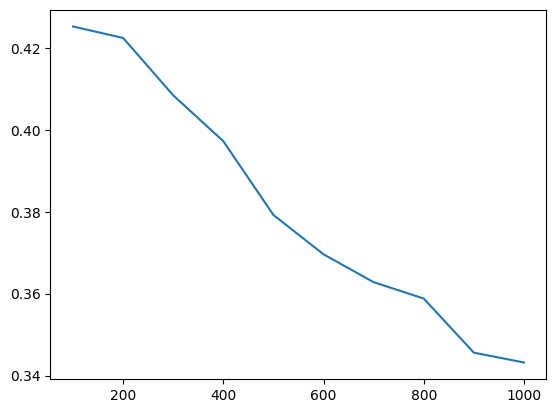

In [481]:
accuracy = []
r=range(100,1100,100) #peaks at 950/1000
for i in r: 
    model = KNeighborsClassifier(n_neighbors=i, weights = 'uniform' , n_jobs=-1)
    model.fit(imagesTrain_r,labelsTrain['eye_color'])
    accuracy.append(model.score(imagesTest_r,labelsTest['eye_color']))
plt.plot(r,accuracy)

In [471]:
predictions = model2.predict(imagesTrain_g) # misclassifying all the glasses
count=0

for d, prediction, label in zip(imagesTrain_g.values, predictions, labelsTrain['eye_color']):

    if prediction != label:
        print(count,d, 'has been classified as ', prediction, 'and should be ', label)
    count+=1

0 [  0. 154.   0. ...   0.   7.   0.] has been classified as  4 and should be  1
1 [  0. 164.   0. ...   0.   9.   0.] has been classified as  4 and should be  2
2 [  0. 154.   0. ...   0. 161.   0.] has been classified as  1 and should be  2
3 [  0.  51.   0. ...   0. 216.   0.] has been classified as  3 and should be  2
8 [  0. 164.   0. ...   0. 180.   0.] has been classified as  2 and should be  1
9 [ 0. 74.  0. ...  0. 89.  0.] has been classified as  1 and should be  2
10 [  0. 111.   0. ...   0.  61.   0.] has been classified as  1 and should be  2
11 [  0. 111.   0. ...   0.   0.   0.] has been classified as  0 and should be  4
13 [  0.  74.   0. ...   0. 161.   0.] has been classified as  2 and should be  3
14 [  0.  51.   0. ...   0. 206.   0.] has been classified as  2 and should be  3
15 [ 0. 83.  0. ...  0. 89.  0.] has been classified as  1 and should be  3
16 [  0.  74.   0. ...   0. 116.   0.] has been classified as  1 and should be  0
17 [  0. 164.   0. ...   0. 155.  

6147 [  0. 125.   0. ...   0.  20.   0.] has been classified as  4 and should be  0
6148 [  0. 224.   0. ...   0. 180.   0.] has been classified as  0 and should be  1
6150 [  0. 164.   0. ...   0.  21.   0.] has been classified as  4 and should be  0
6151 [  0. 154.   0. ...   0. 216.   0.] has been classified as  3 and should be  2
6152 [  0. 222.   0. ...   0. 218.   0.] has been classified as  3 and should be  1
6153 [  0. 154.   0. ...   0.  12.   0.] has been classified as  4 and should be  2
6154 [  0. 224.   0. ...   0.  14.   0.] has been classified as  4 and should be  2
6157 [  0. 187.   0. ...   0.  20.   0.] has been classified as  4 and should be  0
6158 [  0. 164.   0. ...   0. 116.   0.] has been classified as  1 and should be  2
6165 [  0. 187.   0. ...   0.   0.   0.] has been classified as  4 and should be  1
6167 [  0.  21.   0. ...   0. 205.   0.] has been classified as  3 and should be  1
6170 [  0. 111.   0. ...   0.  89.   0.] has been classified as  1 and shoul

In [472]:
predictions = model3.predict(imagesTrain_b) # misclassifying all the glasses
count=0

for d, prediction, label in zip(imagesTrain_b.values, predictions, labelsTrain['eye_color']):

    if prediction != label:
        print(count,d, 'has been classified as ', prediction, 'and should be ', label)
    count+=1

0 [  0.   0. 216. ...   0.   0.  28.] has been classified as  4 and should be  1
1 [  0.   0. 144. ...   0.   0.  14.] has been classified as  1 and should be  2
2 [  0.   0. 216. ...   0.   0. 217.] has been classified as  0 and should be  2
4 [  0.   0. 144. ...   0.   0. 246.] has been classified as  2 and should be  0
7 [  0.   0. 161. ...   0.   0. 219.] has been classified as  0 and should be  3
8 [  0.   0. 144. ...   0.   0. 227.] has been classified as  2 and should be  1
9 [  0.   0. 192. ...   0.   0. 136.] has been classified as  1 and should be  2
10 [  0.   0. 237. ...   0.   0.  96.] has been classified as  1 and should be  2
11 [  0.   0. 237. ...   0.   0.   0.] has been classified as  1 and should be  4
12 [  0.   0. 192. ...   0.   0.  96.] has been classified as  1 and should be  0
13 [  0.   0. 192. ...   0.   0. 217.] has been classified as  0 and should be  3
14 [  0.   0.  91. ...   0.   0. 253.] has been classified as  2 and should be  3
15 [  0.   0. 161. ... 

4439 [  0.   0. 216. ...   0.   0. 240.] has been classified as  2 and should be  1
4440 [  0.   0. 161. ...   0.   0. 227.] has been classified as  2 and should be  0
4441 [  0.   0. 255. ...   0.   0.   0.] has been classified as  4 and should be  1
4442 [ 0.  0. 30. ...  0.  0. 26.] has been classified as  1 and should be  4
4443 [  0.   0. 224. ...   0.   0.  96.] has been classified as  0 and should be  3
4445 [  0.   0. 255. ...   0.   0. 136.] has been classified as  1 and should be  4
4446 [  0.   0.  30. ...   0.   0. 199.] has been classified as  3 and should be  0
4448 [  0.   0. 237. ...   0.   0.   2.] has been classified as  4 and should be  1
4450 [  0.   0. 192. ...   0.   0. 238.] has been classified as  0 and should be  3
4451 [  0.   0. 224. ...   0.   0.  12.] has been classified as  4 and should be  2
4452 [  0.   0. 144. ...   0.   0. 246.] has been classified as  2 and should be  3
4454 [  0.   0. 216. ...   0.   0. 199.] has been classified as  3 and should be  